In [213]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from  av.io import read
import pandas as pd
import datetime

In [214]:
def read_and_plot(filename, msg="", cuts=None, label=None, plot=False):
    data = read(" ".join(["a:" + str(i) for i in range(4)]), filename, 50)
    datapairs = list(zip(data[0], data[1]))
    
    df = pd.DataFrame()
    names = []
    col_name_tpls = []
    for sensor_data, stream_object in datapairs:
        meta_dict = stream_object.metadata
        print(meta_dict)
        name = meta_dict["NAME"]
        names.append(name)
        n_cols = len(sensor_data)
        col_names = []
        for i in range(n_cols):
            col_name = name + "_" + str(i)
            col_names.append(col_name)
            df[col_name] = pd.Series(sensor_data.T[:,i])
        col_name_tpls.append(col_names)
    df.index = pd.TimedeltaIndex(freq="20ms", start=0.0, periods=len(df))
    df_out_list = []
    if cuts:
        
        for cut in cuts:
            df_i = df[pd.Timedelta(10**9 * cut[0]):pd.Timedelta(10**9 * cut[1])]
            df_out_list.append(df_i)
            df_i["Cywee Accelerometer Sensor_2"].plot()
            plt.show()
    # 3d plots
    for col_name_list in col_name_tpls:
        if len(col_name_list) == 3:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.plot3D(*[df[col_name_list].iloc[:,i] for i in range(3)])
            ax.set_title(col_name_list[0][:-2])
            plt.show()
            print("("+ msg + ")")
            

    #2d plots
    for col_name_tpl in col_name_tpls:
        for col_name in col_name_tpl:
            if "acc" in col_name.lower():
                fig = df[col_name].plot()
                fig.set_title(col_name)
                plt.show()
                print("("+ msg + ")")
    df.to_csv("out.csv", header=False)
    print(len(df))
    
    return df, df_out_list, col_name_tpls

In [215]:
def find_peaks(df, start=0.0, end=None):
    peaks = []
    if end:
        df = df[pd.Timedelta(10**9 * start):pd.Timedelta(10**9 * end)]
    else:
        df = df[pd.Timedelta(10**9 * start):]

    for i in df.index:
        value = df["Cywee Accelerometer Sensor_2"][i]
        if value > 9:
            new = True
            for peak in peaks:
                if i - pd.Timedelta(10**9) < peak + pd.Timedelta(10**9):
                    new = False
                    break
            if new:
                peaks.append(i)
    cuts = []
    for peak in peaks:
        t = peak.value / 10 ** 9
        cuts.append((t-1, t+1))
    return cuts 

{'NAME': 'Rotation Vector (WAKE_UP)', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.180000000'}
{'NAME': 'Cywee Accelerometer Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.080000000'}
{'NAME': 'Cywee Gyroscope Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.120000000'}
{'NAME': 'Cywee Magnetic field Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.120000000'}


/home/gende/repos/PyAV/venvs/Linux.4.4.0-17134-Microsoft.cpython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Creating a TimedeltaIndex by passing range endpoints is deprecated.  Use `pandas.timedelta_range` instead.


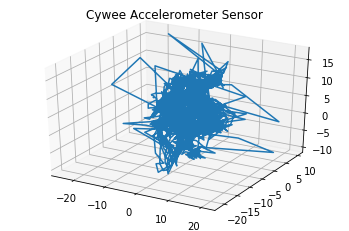

(Swipe RIGHT)


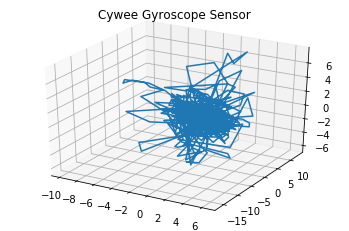

(Swipe RIGHT)


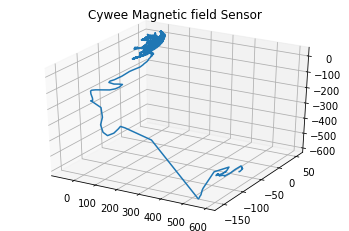

(Swipe RIGHT)


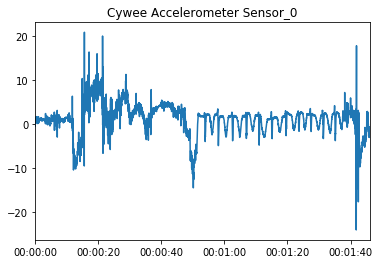

(Swipe RIGHT)


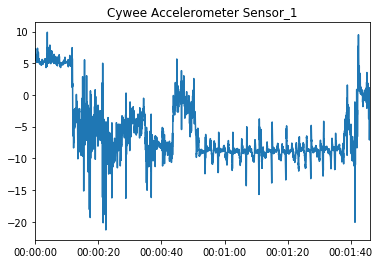

(Swipe RIGHT)


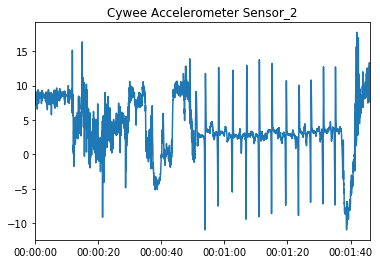

(Swipe RIGHT)
5309
{'NAME': 'Rotation Vector (WAKE_UP)', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.180000000'}
{'NAME': 'Cywee Accelerometer Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.080000000'}
{'NAME': 'Cywee Gyroscope Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.120000000'}
{'NAME': 'Cywee Magnetic field Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.120000000'}


/home/gende/repos/PyAV/venvs/Linux.4.4.0-17134-Microsoft.cpython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Creating a TimedeltaIndex by passing range endpoints is deprecated.  Use `pandas.timedelta_range` instead.


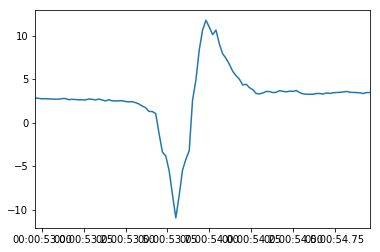

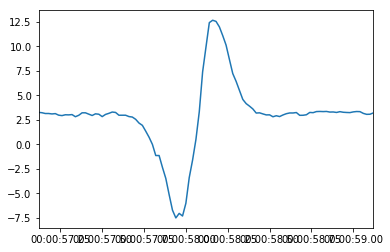

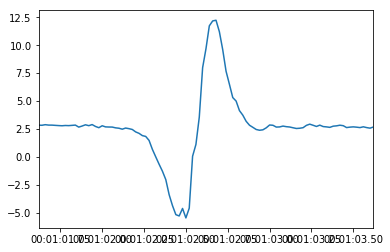

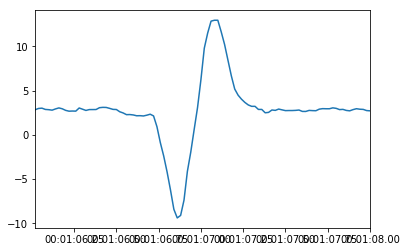

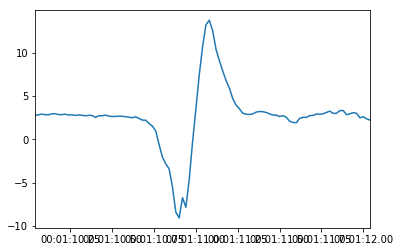

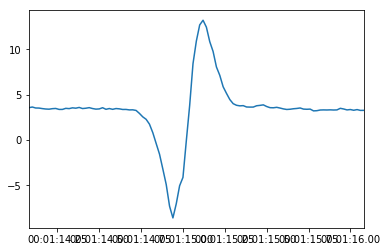

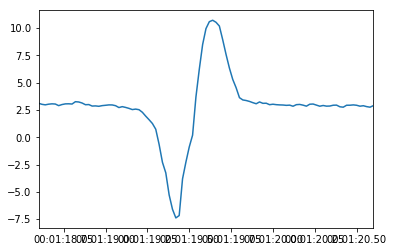

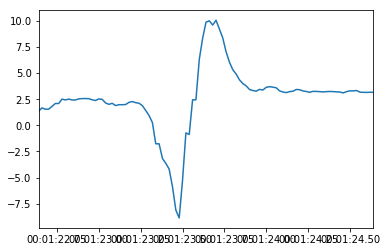

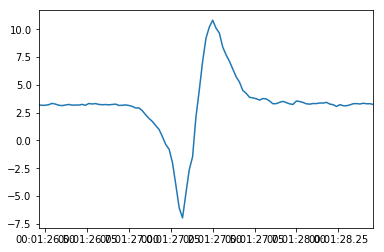

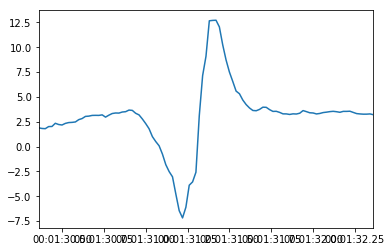

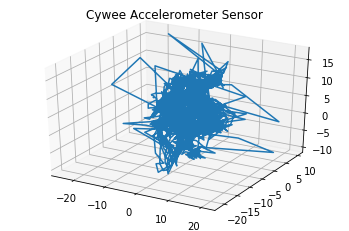

(Swipe RIGHT)


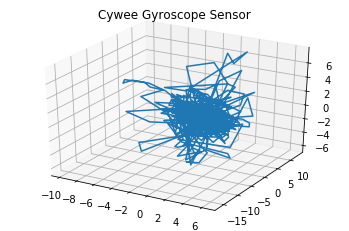

(Swipe RIGHT)


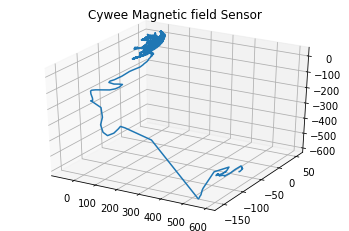

(Swipe RIGHT)


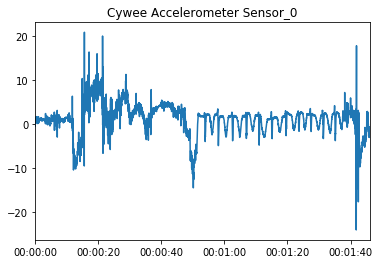

(Swipe RIGHT)


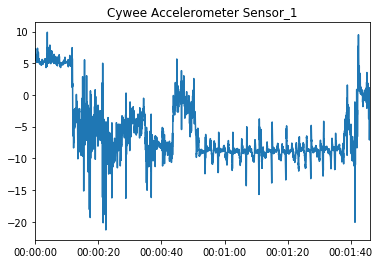

(Swipe RIGHT)


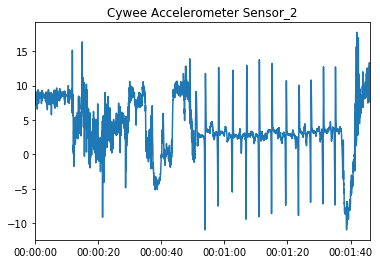

(Swipe RIGHT)
5309


In [216]:
df_swipe_right, df_list, _ = read_and_plot("swipe_right_10_new.mkv", msg="Swipe RIGHT", plot=False)
cuts = find_peaks(df_swipe_right,53,94.6)
df_swipe_right, df_list, _ = read_and_plot("swipe_right_10_new.mkv", msg="Swipe RIGHT", cuts=cuts)


{'NAME': 'Rotation Vector (WAKE_UP)', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:07.100000000'}
{'NAME': 'Cywee Accelerometer Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:06.940000000'}
{'NAME': 'Cywee Gyroscope Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:07.000000000'}
{'NAME': 'Cywee Magnetic field Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:07.000000000'}


/home/gende/repos/PyAV/venvs/Linux.4.4.0-17134-Microsoft.cpython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Creating a TimedeltaIndex by passing range endpoints is deprecated.  Use `pandas.timedelta_range` instead.


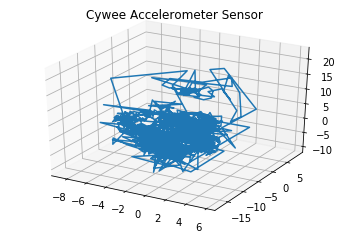

(Swipe RIGHT)


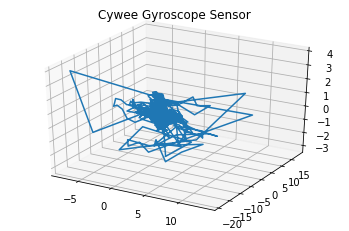

(Swipe RIGHT)


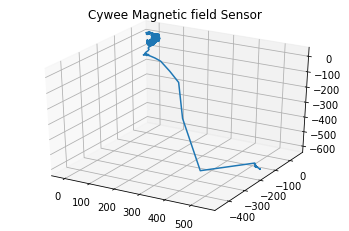

(Swipe RIGHT)


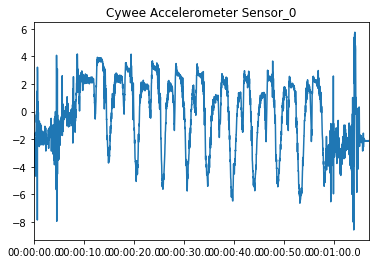

(Swipe RIGHT)


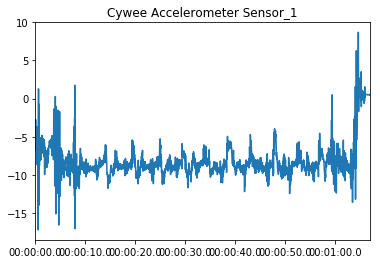

(Swipe RIGHT)


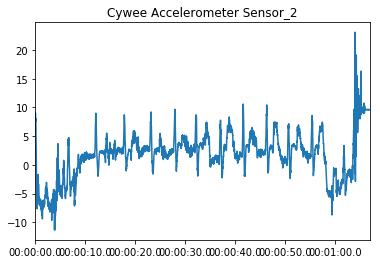

(Swipe RIGHT)
3350
{'NAME': 'Rotation Vector (WAKE_UP)', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:07.100000000'}
{'NAME': 'Cywee Accelerometer Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:06.940000000'}
{'NAME': 'Cywee Gyroscope Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:07.000000000'}
{'NAME': 'Cywee Magnetic field Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:07.000000000'}


/home/gende/repos/PyAV/venvs/Linux.4.4.0-17134-Microsoft.cpython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Creating a TimedeltaIndex by passing range endpoints is deprecated.  Use `pandas.timedelta_range` instead.


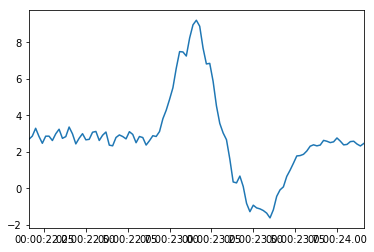

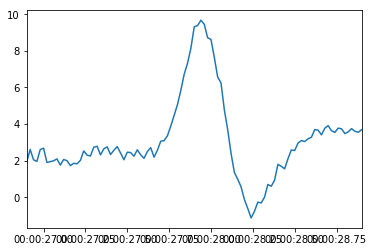

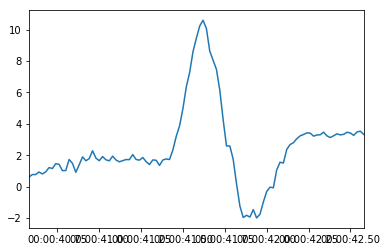

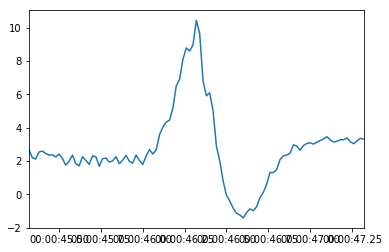

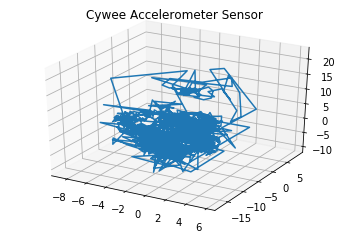

(Swipe RIGHT)


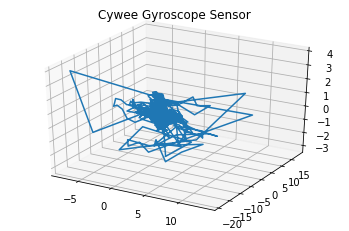

(Swipe RIGHT)


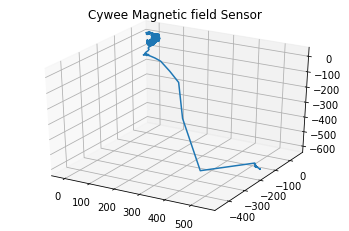

(Swipe RIGHT)


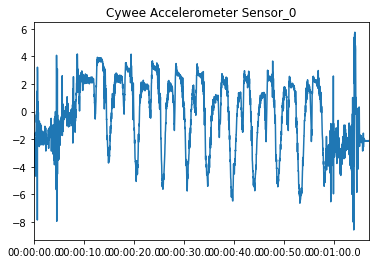

(Swipe RIGHT)


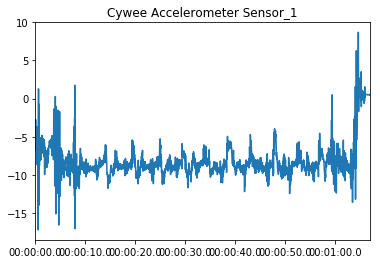

(Swipe RIGHT)


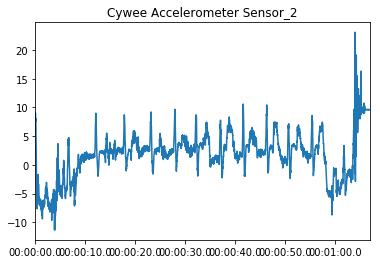

(Swipe RIGHT)
3350


In [217]:
df_swipe_right, df_list, _ = read_and_plot("swipe_left_10.mkv", msg="Swipe RIGHT", plot=False)
cuts = find_peaks(df_swipe_right,10,57.6)
df_swipe_right, df_list, _ = read_and_plot("swipe_left_10.mkv", msg="Swipe RIGHT", cuts=cuts)

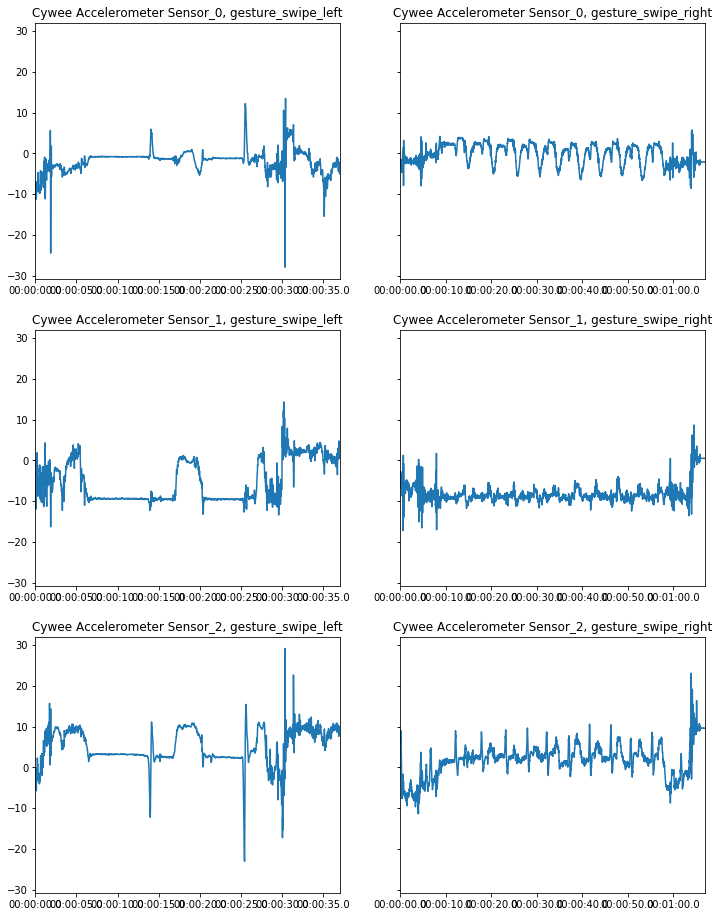

In [219]:
gestures = ["swipe_left", "swipe_right"]

fig, axes = plt.subplots(3,2, sharey=True, figsize=(12, 16))
for col_name_tpl in col_name_tpls:
    for i, col_name in enumerate(col_name_tpl):
        if "acc" in col_name.lower():
            for j,df in enumerate([df_swipe_left, df_swipe_right]):
                df[col_name].plot(ax=axes[i,j])
                axes[i,j].set_title(col_name+ ", gesture_" + gestures[j])

plt.savefig("gesture_acc.pdf")
plt.show()

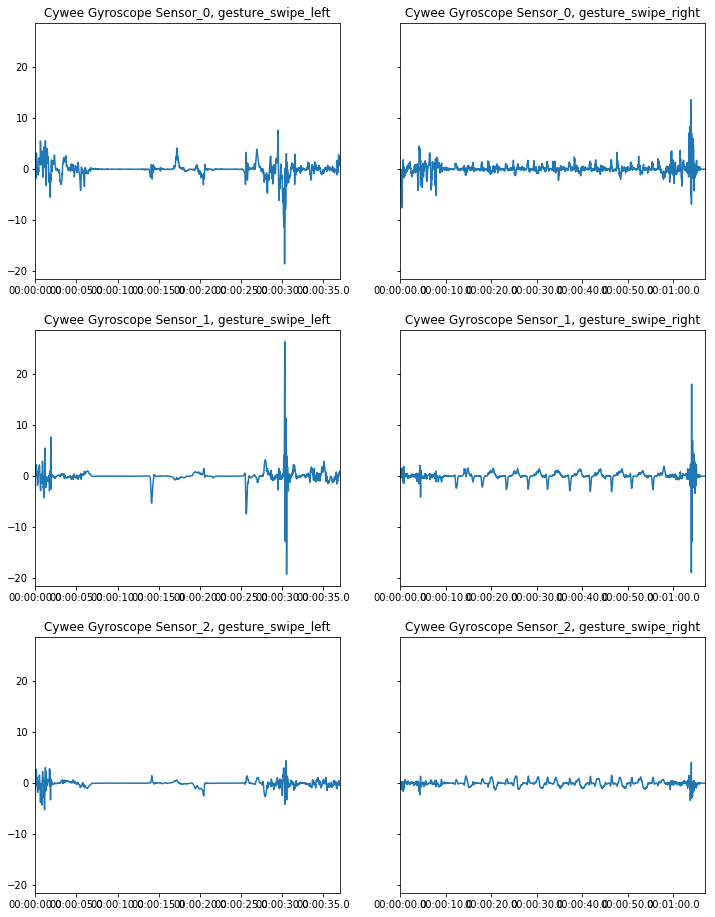

In [220]:
gestures = ["swipe_left", "swipe_right"]

fig, axes = plt.subplots(3,2, sharey=True, figsize=(12, 16))
for col_name_tpl in col_name_tpls:
    for i, col_name in enumerate(col_name_tpl):
        if "gyro" in col_name.lower():
            for j,df in enumerate([df_swipe_left, df_swipe_right]):
                df[col_name].plot(ax=axes[i,j])
                axes[i,j].set_title(col_name+ ", gesture_" + gestures[j])

plt.savefig("gesture_gyro.pdf")
plt.show()


In [221]:
df.shape

(3350, 14)

In [222]:
##col_name_tpls

In [223]:
# plot all in 2D:


In [224]:
df.shape

(3350, 14)

In [225]:
df.index[0]

Timedelta('0 days 00:00:00')

In [226]:
from  seqlearn.hmm import MultinomialHMM as HMM

In [227]:
pd.Timedelta(10**9) # 10 ** 9 is 1 s

# -> ns

Timedelta('0 days 00:00:01')

In [228]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
X, y = sklearn.datasets.load_digits(return_X_y=True)


In [229]:
a = HMM()